https://github.com/RonKG/Machine-Learning-Projects-2/blob/master/1.%20data_cleaning_project/csi_data_cleaning.ipynb

Goal -> predict https://en.wikipedia.org/wiki/University_of_Michigan_Consumer_Sentiment_Index

I propose to use a form of Machine Learning (ML) to make Time Series preditions on the final Consumer Sentiment number to be released.
To do this we are going to use other economic indicators (as features) released before and data from various relevant industries to construct a dataset that is ready to run on predictive algorithims.

In this Notebook, I will combine the various datasets from different sources into one dataset and do the necessary cleaning to achieve a final data configuration fit for a time series forecasting algorithim to solve ABC Financial Services Corp's problem which is mostly a prediction problem.

In [1]:
data_dir = r'/Users/robincole/Documents/Github/Machine-Learning-Projects-2/1. data_cleaning_project/data'

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")

All but one of the datasets were downloaded from the Federal Resreve website and the Down Jones closing prices were downloaded from Yahoo Markets. The list of datasets used above links to the data source.

In [3]:
# load all the datasets to pandas DataFrames

dow     = pd.read_csv(data_dir + '/Dow Jones Industrial Average DJI.csv')
unemp   = pd.read_csv(data_dir + '/Civilian Unemployment Rate UNRATE.csv')
oil     = pd.read_csv(data_dir + '/Crude Oil Prices MCOILBRENTEU.csv')
hstarts = pd.read_csv(data_dir + '/Housing Starts HOUST.csv')
cars    = pd.read_csv(data_dir + '/Total Vehicle SalesTOTALSA .csv')
retail  = pd.read_csv(data_dir + '/Advance Retail Sales_RSXFS.csv')
fedrate = pd.read_csv(data_dir + '/Federal Interest Rates FEDFUNDS.csv')
umcsi   = pd.read_excel(data_dir + '/consumer_sent_UMCH_tbmics.xls',header=3)

## Visually inspect the dataframes
At this stage we do a bit of data exploration to get a better grasp on the number of columns and rows. Pandas does have a few functions we can use even though they may not be enough to help us understand everything about the data. The main goal though at this stage is to find quirks about the data that need to be rectified in the later steps.

dow -> https://finance.yahoo.com/quote/%5EDJI/history/?guccounter=1

In [4]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


In [5]:
dflist = [dow, unemp, oil, hstarts, cars, retail, fedrate, umcsi]

for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

(399, 7)
(841, 2)
(369, 2)
(709, 2)
(505, 2)
(313, 2)
(763, 2)
(574, 3)


In [6]:
# get dataframe top rows view

for i, dfr in enumerate(dflist):
    print(dflist[i].head())

         Date         Open         High          Low        Close  \
0  1985-01-01  1277.719971  1305.099976  1266.890015  1286.770020   
1  1985-02-01  1276.939941  1307.530029  1263.910034  1284.010010   
2  1985-03-01  1285.339966  1309.959961  1242.819946  1266.780029   
3  1985-04-01  1264.800049  1290.300049  1245.800049  1258.060059   
4  1985-05-01  1257.180054  1320.790039  1235.530029  1315.410034   

     Adj Close     Volume  
0  1286.770020   44450000  
1  1284.010010  207300000  
2  1266.780029  201050000  
3  1258.060059  187110000  
4  1315.410034  242250000  
         DATE  UNRATE
0  1948-01-01     3.4
1  1948-02-01     3.8
2  1948-03-01     4.0
3  1948-04-01     3.9
4  1948-05-01     3.5
         DATE  MCOILBRENTEU
0  1987-05-01         18.58
1  1987-06-01         18.86
2  1987-07-01         19.86
3  1987-08-01         18.98
4  1987-09-01         18.31
         DATE   HOUST
0  1959-01-01  1657.0
1  1959-02-01  1667.0
2  1959-03-01  1620.0
3  1959-04-01  1590.0
4  1959

In [7]:
# see which datasets have null values

for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())

0
0
0
0
0
0
0
3


## Observations and Data Cleaning:
In this case, the data we acquired is not overly complicated with hundres of columns but it is good to bear in mind that this is not always the case and we must be comfortable handling such data.

* The date ranges are also very inconsistent. The start dates range from 1947 to 1992.
* The dates in umcsi are in two columns (string month & float year) making it hard to merge with other datsets on that column.
umcsi also has 3 NaN values so we have to remove entire rows where this exists
* For our purposes, the dow dataframe also has extra columns so we will need to get rid of some of them.
* DECIDED CONSISTENT NAMING CONVENTION FOR COLUMNS

In [8]:
# rename columns to upper case to match other dfs

dow.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'VOLUME']
dow.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


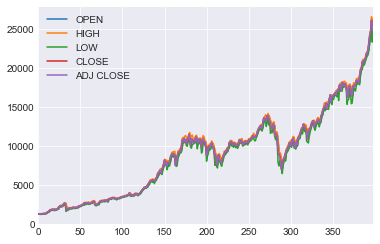

In [9]:
dow[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE']].plot();

In [10]:
# drop NaN Values

umcsi.dropna(inplace=True)

In [11]:
# create 'Year' column with int values instead of float

def to_int(x):
    return int(x)

# ----------------------------

umcsi['Year'] = umcsi['Unnamed: 1'].apply(to_int)
umcsi.head()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT,Year
1,November,1952.0,86.2,1952
2,February,1953.0,90.7,1953
3,August,1953.0,80.8,1953
4,November,1953.0,80.7,1953
5,February,1954.0,82.0,1954


In [12]:
# combine year columns to one column format

umcsi['DATE'] = umcsi.apply(lambda x: datetime.datetime.strptime("{0} {1}".format(x['Year'],x['DATE OF SURVEY']), "%Y %B"),axis=1)
umcsi.head()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT,Year,DATE
1,November,1952.0,86.2,1952,1952-11-01
2,February,1953.0,90.7,1953,1953-02-01
3,August,1953.0,80.8,1953,1953-08-01
4,November,1953.0,80.7,1953,1953-11-01
5,February,1954.0,82.0,1954,1954-02-01


In [13]:
# turn date format to string to match other DATE's. We'll merge the data on this column so this is a vital step.

def to_str(x):
    return str(x)[:10]

# ----------------------------

umcsi['DATE'] = umcsi['DATE'].apply(to_str)
umcsi.head()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT,Year,DATE
1,November,1952.0,86.2,1952,1952-11-01
2,February,1953.0,90.7,1953,1953-02-01
3,August,1953.0,80.8,1953,1953-08-01
4,November,1953.0,80.7,1953,1953-11-01
5,February,1954.0,82.0,1954,1954-02-01


In [14]:
# House keeping below

# drop unneeded columns column
umcsi.drop(['Unnamed: 1','Year','DATE OF SURVEY'], axis=1, inplace=True)

# move 'DATE' column to the front
cols = list(umcsi)
cols.insert(0, cols.pop(cols.index('DATE')))
umcsi = umcsi.reindex(columns = cols)
umcsi.head()

,DATE,INDEX OF CONSUMER SENTIMENT
1,1952-11-01,86.2
2,1953-02-01,90.7
3,1953-08-01,80.8
4,1953-11-01,80.7
5,1954-02-01,82.0


In [15]:
# concatenate all dataframes into one final dataframe using merge and reduce - note that the date range is truncated

dfs = [dow,unemp,oil,hstarts,cars,retail,fedrate,umcsi]
df = reduce(lambda left,right: pd.merge(left,right,on='DATE', how='outer'), dfs).dropna()
print(df.shape)
df.head(20)

(313, 14)


,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,UNRATE,MCOILBRENTEU,HOUST,TOTALSA,RSXFS,FEDFUNDS,INDEX OF CONSUMER SENTIMENT
84,1992-01-01,3152.100098,3299.189941,3139.310059,3223.399902,3223.399902,561160000.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
85,1992-02-01,3223.399902,3293.379883,3207.959961,3267.699951,3267.699951,411150000.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
86,1992-03-01,3267.699951,3299.639893,3188.280029,3235.500000,3235.500000,402410000.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
87,1992-04-01,3235.500000,3366.500000,3161.229980,3359.100098,3359.100098,458300000.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
88,1992-05-01,3359.100098,3440.669922,3324.020020,3396.899902,3396.899902,388240000.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
89,1992-06-01,3396.899902,3422.280029,3254.050049,3318.500000,3318.500000,475360000.0,7.8,21.16,1145.0,13.5,149821.0,3.76,80.4
90,1992-07-01,3318.800049,3402.959961,3266.530029,3393.800049,3393.800049,449770000.0,7.7,20.24,1139.0,12.9,150809.0,3.25,76.6
91,1992-08-01,3393.800049,3399.989990,3207.100098,3257.399902,3257.399902,363380000.0,7.6,19.74,1226.0,12.9,151064.0,3.30,76.1
92,1992-09-01,3257.399902,3376.489990,3242.760010,3271.699951,3271.699951,436570000.0,7.6,20.27,1186.0,13.4,152595.0,3.22,75.6
93,1992-10-01,3271.699951,3280.850098,3095.790039,3226.300049,3226.300049,530760000.0,7.3,20.26,1244.0,13.7,153577.0,3.10,73.3


## Remove outliers
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
* A Z-score is a numerical measurement used in statistics of a value's relationship to the mean (average) of a group of values, measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

In [16]:
# remove all rows with outliers in at least one row

df = df[(np.abs(stats.zscore(df.drop(['DATE'], axis=1))) < 3).all(axis=1)] 
df.shape

(308, 14)

In [17]:
# change the DATE column from String to python's datetime.datetime format

df['DATE'] = df['DATE'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [18]:
# rename columns to more user friendly names

df.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'VOLUME', 'UNEMP %','OIL PRICE','NEW HOMES','NEW CARS SOLD',
                    'RETAIL SALES','FED INTRST %','CSI' ]

## Visualize a few basic end data characteristics.

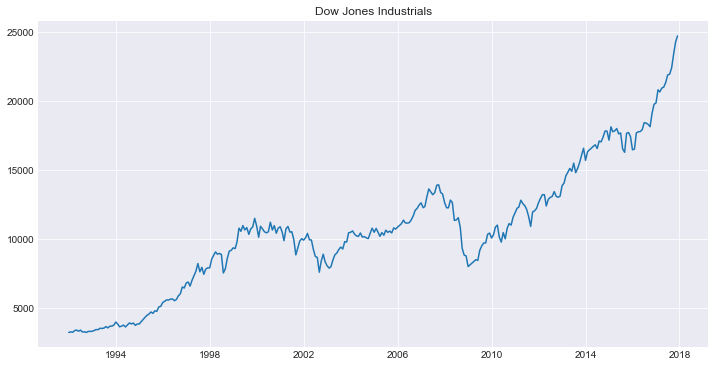

In [19]:
fig = plt.figure(figsize=(12,6))
plt.title('Dow Jones Industrials')
plt.plot(df['DATE'], df['CLOSE']);

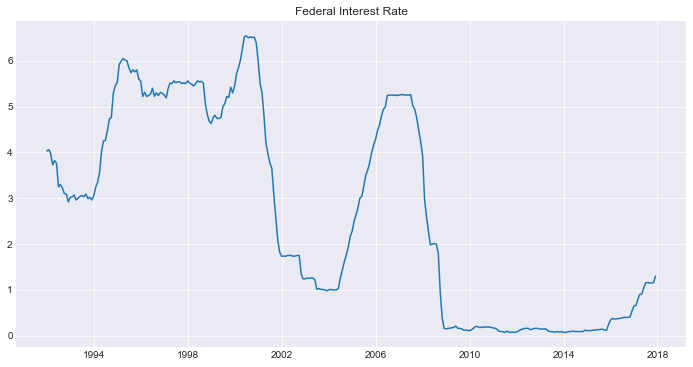

In [20]:
fig = plt.figure(figsize=(12,6))
plt.title('Federal Interest Rate')
plt.plot(df['DATE'], df['FED INTRST %']);

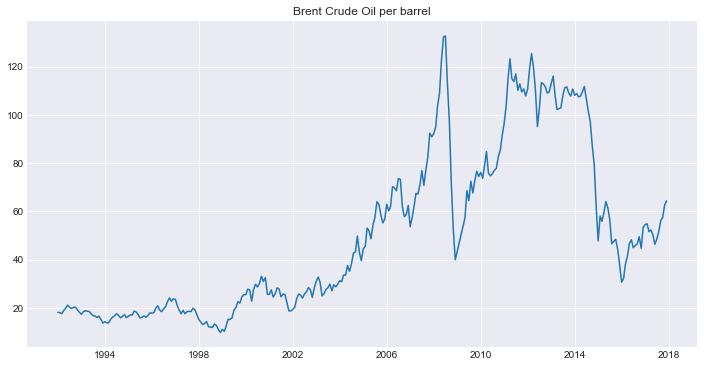

In [21]:
fig = plt.figure(figsize=(12,6))
plt.title('Brent Crude Oil per barrel')
plt.plot(df['DATE'], df['OIL PRICE']);

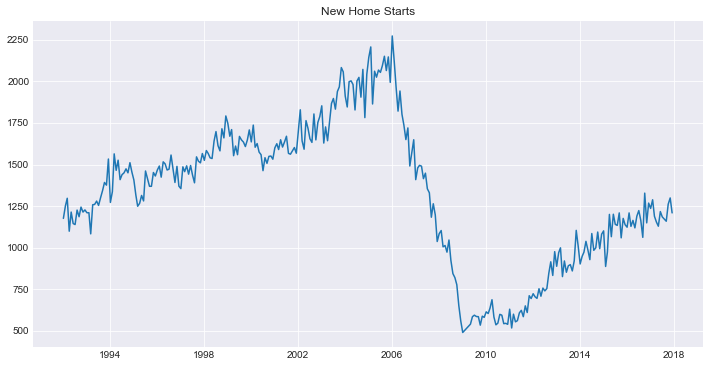

In [22]:
fig = plt.figure(figsize=(12,6))
plt.title('New Home Starts')
plt.plot(df['DATE'], df['NEW HOMES']);

Below I have created a correclation matrix but it is important to note that this is a time series dataset and so the correlations may change with time.

https://www.investopedia.com/terms/c/correlation.asp

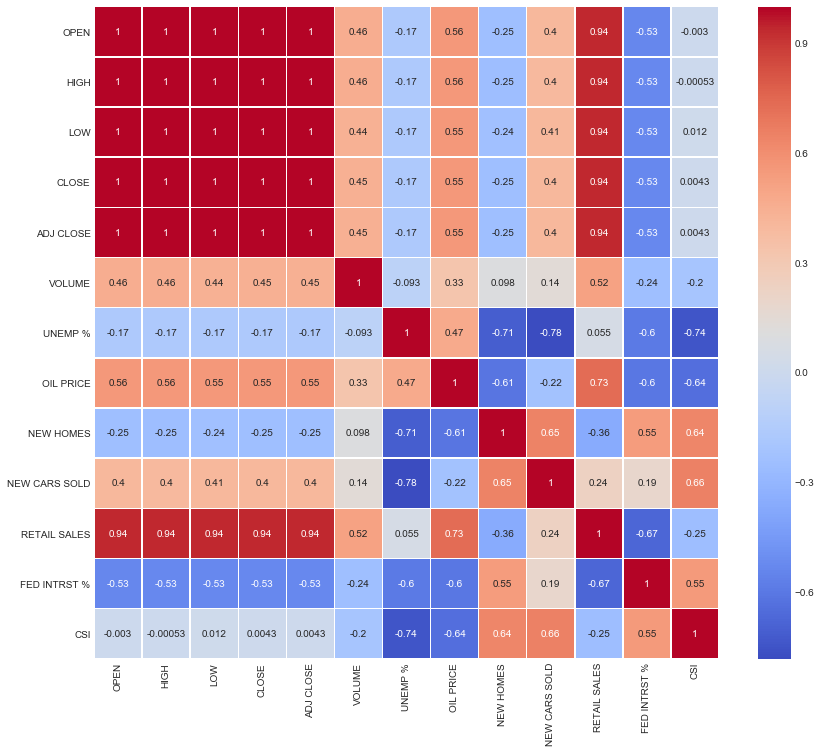

In [23]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5);

From the correlation matrix above the Open, High, Low, Close columns all supply the same information over time from the 1:1 correlation. I think it will be safe to drop all but Close which also happens to be the next day's Open. This is not always the case for high frequency data though.

We should also create a new column / feature from subtracting the LOW and HIGH column called SPREAD which is the difference between the two.

In [24]:
# create new column and drop the less useful columns

df_final = df.copy()
df_final['SPREAD'] = df_final.loc[:,'HIGH'] - df_final.loc[:,'LOW']

df_final.drop(['OPEN', 'HIGH','LOW', 'ADJ CLOSE'],axis=1,inplace=True)
df_final.head()

,DATE,CLOSE,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI,SPREAD
84,1992-01-01,3223.399902,561160000.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5,159.879882
85,1992-02-01,3267.699951,411150000.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8,85.419922
86,1992-03-01,3235.500000,402410000.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0,111.359864
87,1992-04-01,3359.100098,458300000.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2,205.270020
88,1992-05-01,3396.899902,388240000.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2,116.649902


In [25]:
# move the SPREAD column next to CLOSE as they are related

cols = list(df_final)
cols.insert(2, cols.pop(cols.index('SPREAD')))
df_final = df_final.reindex(columns = cols)

In [26]:
# reset the index 

df_final.reset_index(inplace=True)
df_final.drop(['index'],axis=1,inplace=True)

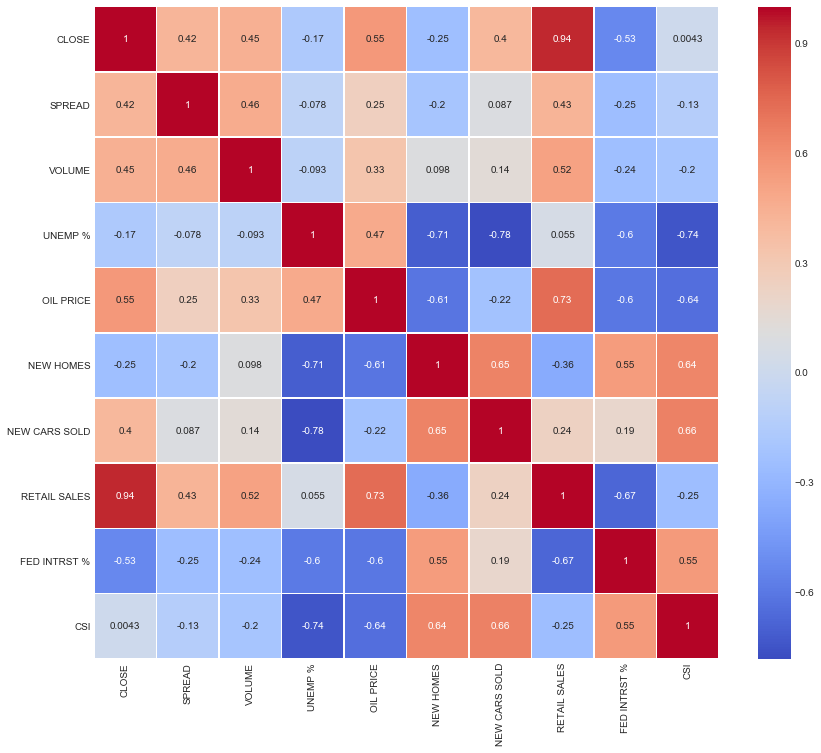

In [27]:
# view final dataframe correlation matrix

df_final_corr = df_final.corr()

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df_final_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5);

## Data cleaning conclusions
Data cleaning comes in all shapes and sizes and there is no one template to handle all situations.
While we do not know how the data will perform for the task of predicting the CSI, we do know that the data supplied has been processed to facilitate fast adoption and testing in a ML enviroment.
Sure we could have engineered more features and processed the current ones some more but that would be to presumptuous on our part as to how the ML team would proceed. For example we could have normalized the features to a common scale but did not.
In conclusion, like most tasks in the data science world, the best we can do is keep asking questions and experiment deeper based on those questions.

In [28]:
df_final._data

BlockManager
Items: Index(['DATE', 'CLOSE', 'SPREAD', 'VOLUME', 'UNEMP %', 'OIL PRICE',
       'NEW HOMES', 'NEW CARS SOLD', 'RETAIL SALES', 'FED INTRST %', 'CSI'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=308, step=1)
DatetimeBlock: slice(0, 1, 1), 1 x 308, dtype: datetime64[ns]
FloatBlock: slice(1, 11, 1), 10 x 308, dtype: float64